In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
# implementing Apriori algorithm from mlxtend

# conda install -c conda-forge mlxtend
# pip install mlxtend
# import pandas
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
pwd

'C:\\Users\\willn\\SynergisticIT\\Data Science\\Association Rule'

In [4]:
# create empty list to place file contents into
groceries = []
# use open and read methods to read in file and place its contents into empty groceries list
with open('groceries.csv') as f:
    groceries = f.read()
groceries

'citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,\ntropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\npip fruit,yogurt,cream cheese,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nother vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,butter,yogurt,rice,abrasive cleaner,,,,,,,,,,,,,,,,,,,,,,,,,,,\nrolls/buns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),,,,,,,,,,,,,,,,,,,,,,,,,,,\npot plants,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nwhole milk,cereals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\ntropical fruit,other vegetables,white bread,bottled water,chocolate,,,,,,,,,,,,,,,,,,,,,,,,,,,\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes,,,,,,,,,,,,,,,,,,,,,,,\nfrankfurter,rolls/buns,soda,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nchicken,tropical fruit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\nbutter,sugar,fruit/

In [5]:
# splitting the data into separate transactions(lists) using the separator as '\n'

groceries = groceries.split('\n')

In [6]:
groceries

['citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'tropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'whole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'pip fruit,yogurt,cream cheese,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'whole milk,butter,yogurt,rice,abrasive cleaner,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'rolls/buns,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'pot plants,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'whole milk,cereals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes,,,,,,,,,,,,,,,,,,,,,,,',
 'frankfurter,rolls/buns,soda,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'chicken,tropical fruit,,,,,,,,,,,

In [7]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(','))
print(groceries_list)

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['tropical fruit', 'yogurt', 'coffee', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['whole milk', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

In [8]:
# accessing each row using item loop variable while accessing each item in a single row through i
all_groceries_list = [i for item in groceries_list for i in item]

all_groceries_list

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'tropical fruit',
 'yogurt',
 'coffee',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'whole milk',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'pip fruit',
 'yogurt',
 'cream cheese',
 'meat spreads',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'whole mi

In [9]:
# import libraries to assist in counting and sorting
from collections import Counter # , OrderedDict

item_frequencies = Counter(all_groceries_list)

In [10]:
# not sorted
item_frequencies

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         '': 271322,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
     

In [11]:
type(item_frequencies)

collections.Counter

In [12]:
# after sorting
item_frequencies = sorted(item_frequencies.items(), key= lambda x:x[1])
item_frequencies
## index location question ########

[('baby food', 1),
 ('sound storage medium', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8),
 ('salad dressing', 8),
 ('whisky', 8),
 ('liqueur', 9),
 ('rubbing alcohol', 10),
 ('hair spray', 11),
 ('frozen fruits', 12),
 ('cream', 13),
 ('honey', 15),
 ('decalcifier', 15),
 ('organic products', 16),
 ('specialty vegetables', 17),
 ('ready soups', 18),
 ('flower soil/fertilizer', 19),
 ('prosecco', 20),
 ('cocoa drinks', 22),
 ('organic sausage', 22),
 ('pudding powder', 23),
 ('tidbits', 23),
 ('cooking chocolate', 25),
 ('soap', 26),
 ('bathroom cleaner', 27),
 ('cookware', 27),
 ('potato products', 28),
 ('fish', 29),
 ('snack products', 30),
 ('nut snack', 31),
 ('artif. sweetener', 32),
 ('canned fruit', 32),
 ('syrup', 32),
 ('nuts/prunes', 33),
 ('abrasive cleaner', 35),
 ('skin care', 35),
 ('specialty fat', 36),
 ('tea', 38),
 ('brandy', 41),
 ('light bulb

In [13]:
item_frequencies[0][1]

1

In [14]:
# Storing frequencies and items in separate variables
# create list of every value at index[1] position (frequency) in reverse(descending) order in item_frequencies collection
frequencies = list(reversed([i[1] for i in item_frequencies])) 

# create list of every value at index[0] position (item) in reverse(descending) order in item_frequencies collection
items = list(reversed([i[0] for i in item_frequencies]))

In [15]:
frequencies

[271322,
 2513,
 1903,
 1809,
 1715,
 1372,
 1087,
 1072,
 1032,
 969,
 924,
 875,
 814,
 792,
 785,
 764,
 744,
 711,
 705,
 638,
 624,
 580,
 576,
 571,
 567,
 545,
 524,
 515,
 515,
 488,
 473,
 422,
 414,
 390,
 378,
 372,
 368,
 365,
 333,
 329,
 327,
 327,
 324,
 305,
 299,
 294,
 279,
 279,
 276,
 275,
 269,
 256,
 256,
 254,
 246,
 241,
 241,
 229,
 220,
 207,
 189,
 189,
 187,
 176,
 174,
 174,
 173,
 171,
 170,
 168,
 163,
 160,
 148,
 148,
 140,
 130,
 128,
 118,
 115,
 112,
 110,
 109,
 106,
 106,
 106,
 103,
 102,
 101,
 101,
 93,
 91,
 90,
 89,
 89,
 88,
 84,
 84,
 83,
 82,
 80,
 79,
 78,
 75,
 73,
 71,
 68,
 67,
 64,
 64,
 60,
 59,
 57,
 56,
 55,
 54,
 54,
 53,
 51,
 50,
 50,
 50,
 45,
 44,
 42,
 42,
 41,
 41,
 38,
 36,
 35,
 35,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 28,
 27,
 27,
 26,
 25,
 23,
 23,
 22,
 22,
 20,
 19,
 18,
 17,
 16,
 15,
 15,
 13,
 12,
 11,
 10,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 4,
 4,
 2,
 1,
 1]

In [16]:
print(type(frequencies))

<class 'list'>


In [17]:
# remove very high value at position 0 that we know is just the frequency of commas and not relevant
frequencies.pop(0)
frequencies

[2513,
 1903,
 1809,
 1715,
 1372,
 1087,
 1072,
 1032,
 969,
 924,
 875,
 814,
 792,
 785,
 764,
 744,
 711,
 705,
 638,
 624,
 580,
 576,
 571,
 567,
 545,
 524,
 515,
 515,
 488,
 473,
 422,
 414,
 390,
 378,
 372,
 368,
 365,
 333,
 329,
 327,
 327,
 324,
 305,
 299,
 294,
 279,
 279,
 276,
 275,
 269,
 256,
 256,
 254,
 246,
 241,
 241,
 229,
 220,
 207,
 189,
 189,
 187,
 176,
 174,
 174,
 173,
 171,
 170,
 168,
 163,
 160,
 148,
 148,
 140,
 130,
 128,
 118,
 115,
 112,
 110,
 109,
 106,
 106,
 106,
 103,
 102,
 101,
 101,
 93,
 91,
 90,
 89,
 89,
 88,
 84,
 84,
 83,
 82,
 80,
 79,
 78,
 75,
 73,
 71,
 68,
 67,
 64,
 64,
 60,
 59,
 57,
 56,
 55,
 54,
 54,
 53,
 51,
 50,
 50,
 50,
 45,
 44,
 42,
 42,
 41,
 41,
 38,
 36,
 35,
 35,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 28,
 27,
 27,
 26,
 25,
 23,
 23,
 22,
 22,
 20,
 19,
 18,
 17,
 16,
 15,
 15,
 13,
 12,
 11,
 10,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 4,
 4,
 2,
 1,
 1]

In [18]:
items

['',
 'whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'berries',
 'hamburger meat',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'frozen meals',
 'misc. beverages',
 'oil',
 'butter milk',
 'specialty bar',
 'ham',
 'beverages',
 'meat',
 'ice cream',
 'sliced cheese',
 'hard cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'red/blush wine',
 'detergent',
 'white wine',
 'pickled vegetables',
 'baking powder',
 'semi-finished 

In [19]:
print(type(items))

<class 'list'>


In [20]:
# remove the item at position 0 that we know is just ',' and not relevant
items.pop(0)
items

['whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'berries',
 'hamburger meat',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'frozen meals',
 'misc. beverages',
 'oil',
 'butter milk',
 'specialty bar',
 'ham',
 'beverages',
 'meat',
 'ice cream',
 'sliced cheese',
 'hard cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'red/blush wine',
 'detergent',
 'white wine',
 'pickled vegetables',
 'baking powder',
 'semi-finished bread

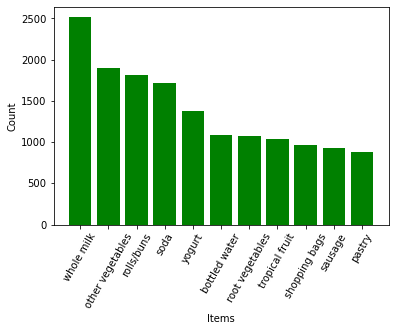

In [21]:
# import graphing library

import matplotlib.pyplot as plt

plt.bar(height=frequencies[0:11], x=list(range(0,11)), color='green' )
#plt.bar(height = frequencies[0:11], x = list(range(0, 11)), color = 'rgbkymc')
plt.xticks(list(range(0, 11), ), items[0:11], rotation=60)
plt.xlabel('Items')
plt.ylabel('Count')
plt.show()

In [22]:
# create data frame for the transactions data

groceries_series = pd.DataFrame(pd.Series(groceries_list))

In [23]:
# I didn't have an empty transaction at the end like the example notebook as I removed it in a previous step
groceries_series

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee, , , , , , , ,..."
2,"[whole milk, , , , , , , , , , , , , , , , , ,..."
3,"[pip fruit, yogurt, cream cheese, meat spreads..."
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9829,"[sausage, chicken, beef, hamburger meat, citru..."
9830,"[cooking chocolate, , , , , , , , , , , , , , ..."
9831,"[chicken, citrus fruit, other vegetables, butt..."
9832,"[semi-finished bread, bottled water, soda, bot..."


In [24]:
# labeling the column
groceries_series.columns = ['Transactions']

groceries_series

,Transactions
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee, , , , , , , ,..."
2,"[whole milk, , , , , , , , , , , , , , , , , ,..."
3,"[pip fruit, yogurt, cream cheese, meat spreads..."
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9829,"[sausage, chicken, beef, hamburger meat, citru..."
9830,"[cooking chocolate, , , , , , , , , , , , , , ..."
9831,"[chicken, citrus fruit, other vegetables, butt..."
9832,"[semi-finished bread, bottled water, soda, bot..."


In [25]:
groceries_series

,Transactions
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee, , , , , , , ,..."
2,"[whole milk, , , , , , , , , , , , , , , , , ,..."
3,"[pip fruit, yogurt, cream cheese, meat spreads..."
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9829,"[sausage, chicken, beef, hamburger meat, citru..."
9830,"[cooking chocolate, , , , , , , , , , , , , , ..."
9831,"[chicken, citrus fruit, other vegetables, butt..."
9832,"[semi-finished bread, bottled water, soda, bot..."


In [26]:
# creating dummy columns for every item in every transaction... Using the columns names as item names

X = groceries_series['Transactions'].str.join(sep='*').str.get_dummies(sep='*')
X

# Need logic explained here 

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# using the apriori function/thingy to find frequent itemsets
frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames=True)

C:\Users\willn\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [28]:
help(apriori)

Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa

In [29]:
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033455,(UHT-milk)
2,0.017694,(baking powder)
3,0.052369,(beef)
4,0.033252,(berries)
...,...,...
526,0.007932,"(whole milk, whipped/sour cream, tropical fruit)"
527,0.015152,"(whole milk, tropical fruit, yogurt)"
528,0.010881,"(whole milk, whipped/sour cream, yogurt)"
529,0.007830,"(root vegetables, whole milk, other vegetables..."


In [30]:
frequent_itemsets.sort_values('support', ascending=False, inplace=True)

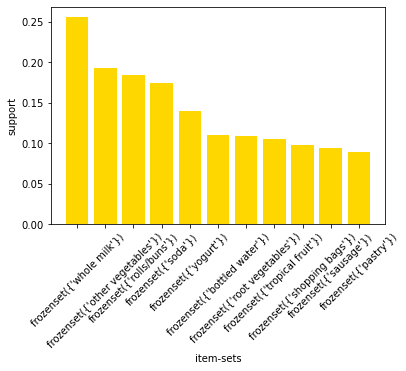

In [31]:
#
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='gold')
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=45)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()


In [32]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
#rules.head(20)
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1175,"(other vegetables, yogurt)","(whole milk, tropical fruit)",0.043421,0.042302,0.007627,0.175644,4.152123,0.005790,1.161753
1170,"(whole milk, tropical fruit)","(other vegetables, yogurt)",0.042302,0.043421,0.007627,0.180288,4.152123,0.005790,1.166971
1090,"(root vegetables, yogurt)","(whole milk, other vegetables)",0.025829,0.074842,0.007830,0.303150,4.050507,0.005897,1.327627
1091,"(whole milk, other vegetables)","(root vegetables, yogurt)",0.074842,0.025829,0.007830,0.104620,4.050507,0.005897,1.087997
793,(berries),(whipped/sour cream),0.033252,0.071690,0.009050,0.272171,3.796499,0.006666,1.275451
792,(whipped/sour cream),(berries),0.071690,0.033252,0.009050,0.126241,3.796499,0.006666,1.106424
1172,"(whole milk, yogurt)","(tropical fruit, other vegetables)",0.056030,0.035896,0.007627,0.136116,3.791972,0.005615,1.116011
1173,"(tropical fruit, other vegetables)","(whole milk, yogurt)",0.035896,0.056030,0.007627,0.212465,3.791972,0.005615,1.198638
1051,(root vegetables),"(beef, other vegetables)",0.109010,0.019727,0.007932,0.072761,3.688317,0.005781,1.057195
1050,"(beef, other vegetables)",(root vegetables),0.019727,0.109010,0.007932,0.402062,3.688317,0.005781,1.490105
